<a href="https://colab.research.google.com/github/Areeff10/email-prediction/blob/main/email_prediction_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
dataset.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Exploratory data analysis (EDA)

In [ ]:
dataset.shape

(5572, 5)

In [ ]:
dataset.drop('Unnamed: 2',axis=1,inplace=True)
dataset.drop('Unnamed: 3',axis=1,inplace=True)
dataset.drop('Unnamed: 4',axis=1,inplace=True)

In [ ]:
dataset = dataset.rename(columns={'v1': 'label', 'v2': 'message'})

In [ ]:
dataset.columns

Index(['label', 'message'], dtype='object')

In [ ]:
dataset.isnull().sum()

,0
v1,0
v2,0


In [ ]:
dataset.duplicated().sum()

403

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset['label'].value_counts()

,count
label,
ham,4516
spam,653


([<matplotlib.patches.Wedge at 0x7b2e1f35a050>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'spam'),
  Text(1.0038714771419537, -0.44971330576360763, 'ham')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

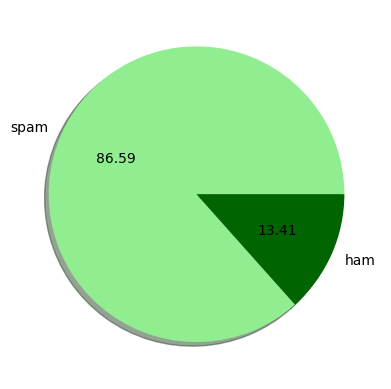

In [ ]:
plt.pie(dataset['label'].value_counts(),labels=['spam','ham'],autopct='%0.2f',shadow=True,colors=['lightgreen','darkgreen'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['no_character']=dataset['message'].apply(len)
dataset['no_word']=dataset['message'].apply(lambda x:len(word_tokenize(x)))
dataset['no_sent']=dataset['message'].apply(lambda x:len(sent_tokenize(x)))

In [ ]:
dataset[dataset['label']=='ham'][['no_word','no_sent','no_character']].describe()

,no_word,no_sent,no_character
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [ ]:
dataset[dataset['label']=='spam'][['no_word','no_sent','no_character']].describe()

,no_word,no_sent,no_character
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


<Axes: xlabel='no_character', ylabel='Count'>

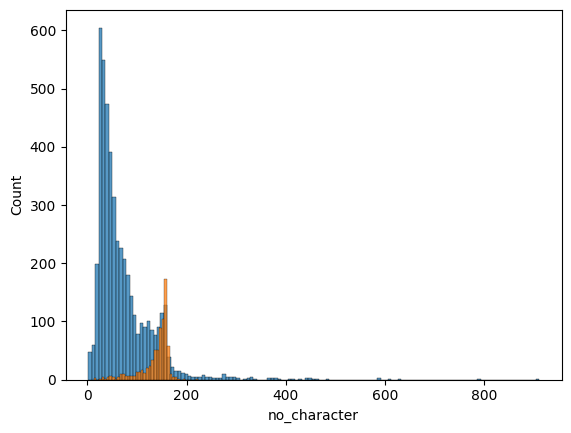

In [ ]:
sns.histplot(dataset[dataset['v1']=='ham']['no_character'])
sns.histplot(dataset[dataset['v1']=='spam']['no_character'])

In [ ]:
df=dataset[['label','no_word','no_sent','no_character',]]

In [ ]:
dataset.columns

Index(['label', 'message', 'no_character', 'no_word', 'no_sent', 'target'], dtype='object')

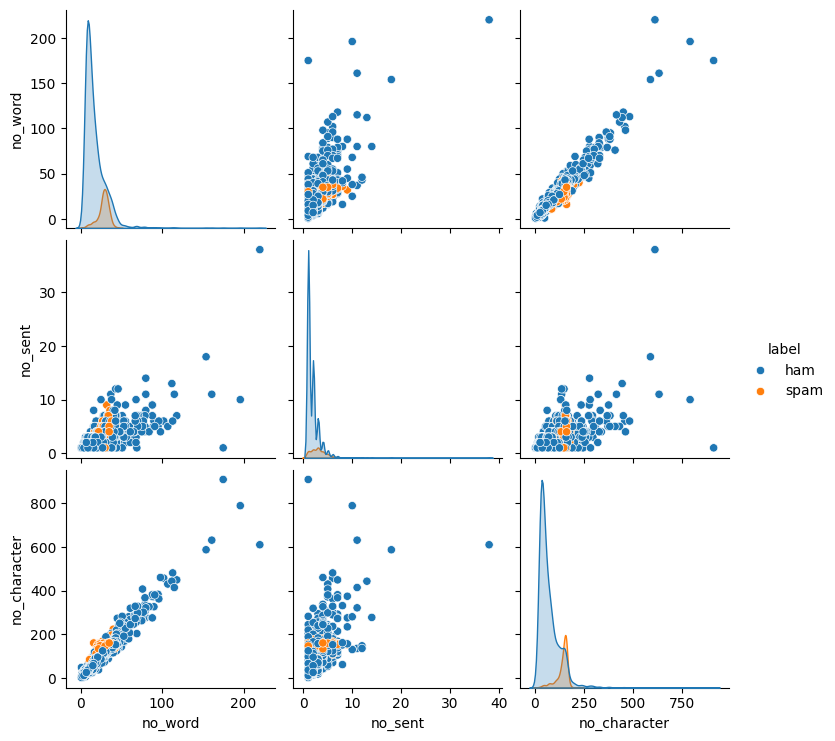

In [ ]:
sns.pairplot(data=df,hue='label')

# Feature Engineering and Preprocessing for Modelling

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop=stopwords.words('english')
stop_word=stop+list(punctuation)

In [ ]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum() or i in punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)


    ps = PorterStemmer()
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Transforming textual data into numerical representations

In [ ]:
dataset['transform_mess']=dataset['message'].apply(transform_text)

In [ ]:
cv=CountVectorizer()
input_data=cv.fit_transform(dataset['transform_mess']).toarray()
output_data=dataset['label']

# Splitting data in traning and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

# Gaussian Naive Bayes using Sklearn


In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
print('score of training data:',gnb.score(x_train,y_train),'\nscore of testing data',gnb.score(x_test,y_test),"\n")
print("accuracy",accuracy_score(y_test,gnb.predict(x_test)),"\n")
print('confusion matrix\n',confusion_matrix(y_test,gnb.predict(x_test)))

score of training data: 0.9262394195888755 
score of testing data 0.8684719535783365 

accuracy 0.8684719535783365 

confusion matrix
 [[772 117]
 [ 19 126]]


## Bernoulli Naive Bayes using Sklearn

In [ ]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
print('score of training data:',bnb.score(x_train,y_train),'\nscore of testing data',bnb.score(x_test,y_test),"\n")
print("accuracy",accuracy_score(y_test,bnb.predict(x_test)),"\n")
print('confusion matrix\n',confusion_matrix(y_test,bnb.predict(x_test)))

score of training data: 0.9775090689238211 
score of testing data 0.9661508704061895 

accuracy 0.9661508704061895 

confusion matrix
 [[885   4]
 [ 31 114]]


# Multinomial Naive Bayes using Sklearn

In [ ]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
print('score of training data:',mnb.score(x_train,y_train),'\nscore of testing data',mnb.score(x_test,y_test),"\n")
print("accuracy",accuracy_score(y_test,mnb.predict(x_test)),"\n")
print('confusion matrix\n',confusion_matrix(y_test,mnb.predict(x_test)))

score of training data: 0.9915356711003628 
score of testing data 0.9738878143133463 

accuracy 0.9738878143133463 

confusion matrix
 [[885   4]
 [ 31 114]]


---------------------------------------------------------------------------------------

## Initially, the necessary libraries were imported, and the dataset was loaded. Subsequently, feature engineering was performed, and the textual data was transformed into numerical representations. The dataset was then divided into training and testing subsets, followed by the application of the following models:


### * Gaussian Naive Bayes: This model achieved the lowest accuracy, with training and testing accuracies of 0.92 and 0.86, respectively.

### * Bernoulli Naive Bayes: This model demonstrated good performance, with training and testing accuracies of 0.97 and 0.96, respectively.

### * Multinomial Naive Bayes: This model produced the highest accuracy, with training and testing accuracies of 0.99 and 0.97, respectively."**




